<a href="https://colab.research.google.com/github/yaseenraihana87/sample-git/blob/main/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("Energy_consumption.csv")
df.head()


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [5]:
df['HVACUsage'] = df['HVACUsage'].map({'On': 1, 'Off': 0})
df['LightingUsage'] = df['LightingUsage'].map({'On': 1, 'Off': 0})
df['Holiday'] = df['Holiday'].map({'Yes': 1, 'No': 0})

In [6]:
y = df['EnergyConsumption']

exog = df[['Temperature', 'Occupancy', 'HVACUsage', 'Holiday']]

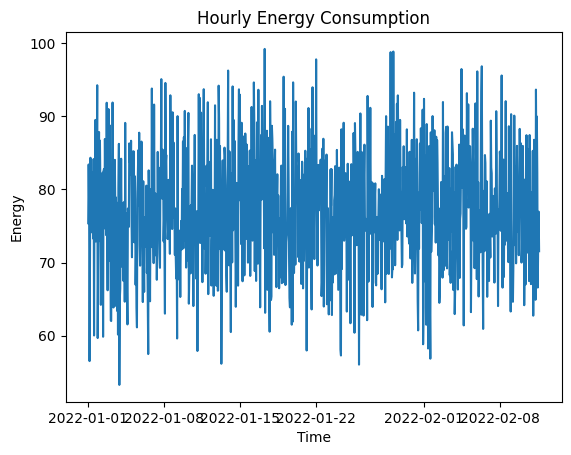

In [7]:
plt.figure()
plt.plot(y)
plt.title("Hourly Energy Consumption")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()

In [8]:
result = adfuller(y)
print("ADF p-value:", result[1])

ADF p-value: 0.0


In [9]:
train = y[:-168]
test = y[-168:]

exog_train = exog[:-168]
exog_test = exog[-168:]

In [10]:
sarima = SARIMAX(
    train,
    order=(1,1,1),
    seasonal_order=(1,1,1,24)
)

sarima_fit = sarima.fit()
sarima_pred = sarima_fit.forecast(168)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [11]:
sarimax = SARIMAX(
    train,
    exog=exog_train,
    order=(1,1,1),
    seasonal_order=(1,1,1,24)
)

sarimax_fit = sarimax.fit()
sarimax_pred = sarimax_fit.forecast(168, exog=exog_test)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
mae_sarima = mean_absolute_error(test, sarima_pred)
rmse_sarima = np.sqrt(mean_squared_error(test, sarima_pred))

mae_sarimax = mean_absolute_error(test, sarimax_pred)
rmse_sarimax = np.sqrt(mean_squared_error(test, sarimax_pred))

print("SARIMA  MAE:", mae_sarima, "RMSE:", rmse_sarima)
print("SARIMAX MAE:", mae_sarimax, "RMSE:", rmse_sarimax)

SARIMA  MAE: 6.373150528932699 RMSE: 7.9355126884021345
SARIMAX MAE: 4.0351146870867165 RMSE: 4.93630826418287


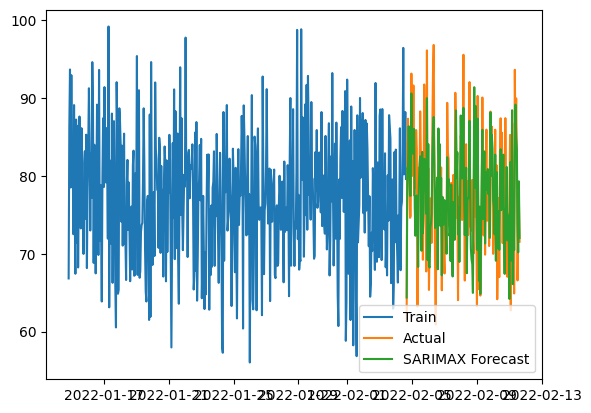

In [13]:
plt.figure()
plt.plot(train[-500:], label="Train")
plt.plot(test, label="Actual")
plt.plot(sarimax_pred, label="SARIMAX Forecast")
plt.legend()
plt.show()

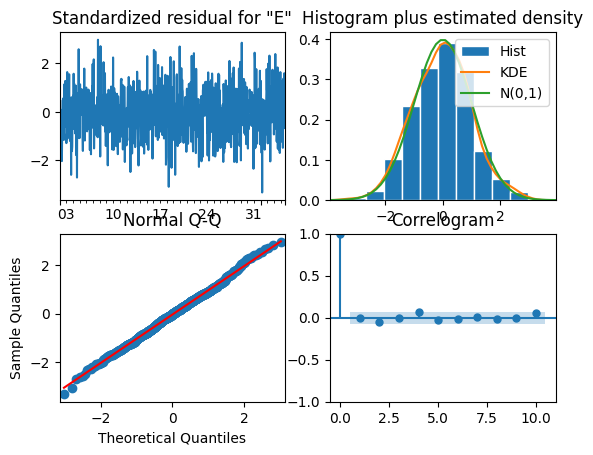

In [14]:
sarimax_fit.plot_diagnostics()
plt.show()

In [15]:
if rmse_sarimax < rmse_sarima:
    print("SARIMAX performs better due to external factors influence.")
else:
    print("SARIMA performs better.")

SARIMAX performs better due to external factors influence.
